## Übung 2

### Problem 2.1 - Lineare Regression mit Least Squares

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [2]:
def print_sample(genfromtxt):
    
    # column names
    print(genfromtxt.dtype.names)
    
    # data
    for row in genfromtxt[:min((len(genfromtxt), 10))]:
        print(row)

x_y = np.genfromtxt('experiment1.csv', delimiter=',', names=True)
loss_qoe = np.genfromtxt('experiment2.csv', delimiter=',', names=True)

print_sample(x_y)
print_sample(loss_qoe)

('x', 'y')
(0.056784, 0.083319)
(0.26073, 0.021207)
(0.029896, 0.075811)
(0.42408, 0.17198)
(0.34106, 0.073962)
(0.54135, 0.22248)
(0.92617, 0.82876)
(0.2985, 0.048244)
(0.33808, 0.11726)
(0.85948, 0.70721)
('loss', 'qoe')
(0.52355, 1.4152)
(0.26084, 2.2719)
(0.49308, 1.3619)
(0.85584, 1.1463)
(0.72441, 1.0478)
(0.19911, 2.455)
(0.15729, 2.6471)
(0.37048, 1.6344)
(0.86227, 1.1464)
(0.68476, 1.0245)


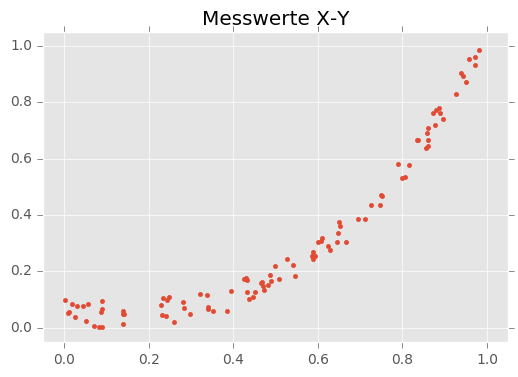

In [3]:
xs = [i[0] for i in x_y]
ys = [i[1] for i in x_y]
plt.plot(xs, ys, '.')

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .05, x_max + .05, y_min - .05, y_max + .05))
plt.title('Messwerte X-Y')

plt.show()

Versuch zur Bestimmung einer linearen Gleichungsfunktion. Eine Gleichung dazu ist in der Form $f(x) = \alpha_0 + \alpha_1x$ mit

$\alpha_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$

$\alpha_0 = \bar{y} - \alpha_1\bar{x}$

$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$ und $\bar{y} = \frac{\sum_{i=1}^{n}y_i}{n}$

[Siehe Wikipedia](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate#Spezialfall_einer_einfachen_linearen_Ausgleichsgeraden)

Formel: f(x) = -0.132 + 0.874x


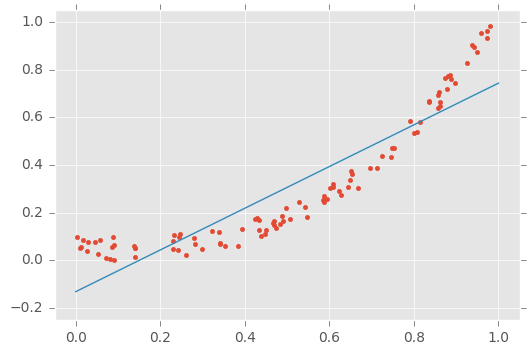

In [4]:
x_avg = sum(xs) / len(xs)
y_avg = sum(ys) / len(ys)

a1_numerator = sum([(xs[i] - x_avg) * (ys[i] - y_avg) for i in range(len(xs))])
a1_denominator = sum([np.power(xs[i] - x_avg, 2) for i in range(len(xs))])
a1 = a1_numerator / a1_denominator
a0 = y_avg - a1 * x_avg

print('Formel: f(x) = {:.3f} + {:.3f}x'.format(a0, a1))

# plot der punkte
xs = [i[0] for i in x_y]
ys = [i[1] for i in x_y]
plt.plot(xs, ys, '.')

# plot der linearen funktion mit gegebenen x werten
plt.plot((0, 1), (a0, a0 + a1))

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .05, x_max + .05, y_min - .05, y_max + .05))

plt.show()

### 2.1.1 Polynom-Fit

Es sollen die Koeffizienten $\beta$ zu Polynomen der Grade 1,2 und 3 bestimmt werden.

$f(x) = a + bx$

$f(x) = a + bx + cx^2$

$f(x) = a + bx + cx^2 + dx^3$

Zuvor wurde bereits das Polynom ersten Grades durch die lineare Gleichungsfunktion bestimmt, muss also nicht mehr ermittelt werden. Im Folgenden werden die Koeffizienten lediglich mit Hilfe der Funktion [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) bestimmt.

[Least Squares Fitting in Python](https://python4mpia.github.io/fitting_data/least-squares-fitting.html)

a=-0.132, b=0.874
a=0.091, b=-0.548, c=1.452
a=0.059, b=-0.084, c=0.230, d=0.834


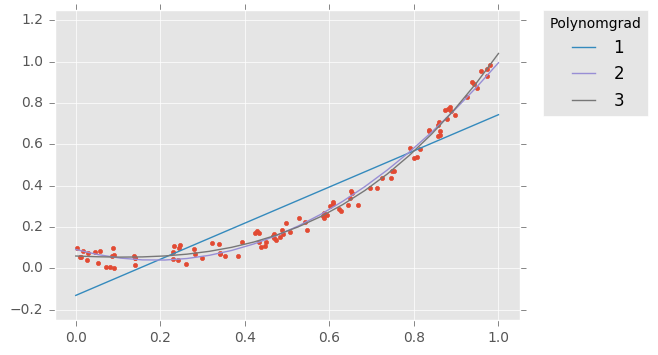

In [5]:
from scipy.optimize import curve_fit

def func_sec_grade(x, a, b, c):
    return a + b * x + c * x * x

def func_third_grade(x, a, b, c, d):
    return a + b * x + c * x * x + d * x * x * x

# plot der punkte
xs = [i[0] for i in x_y]
ys = [i[1] for i in x_y]
plt.plot(xs, ys, '.')

# plot der linearen funktion mit gegebenen x werten
print('a={:.3f}, b={:.3f}'.format(a0, a1))
plt.plot((0, 1), (a0, a0 + a1), label='1')

# curve fitting fuer ein polynom zweiten grades
popt, pcov = curve_fit(func_sec_grade, xs, ys)
print('a={:.3f}, b={:.3f}, c={:.3f}'.format(popt[0], popt[1], popt[2]))
x_sec = np.linspace(0, 1, 20)
y_sec = [func_sec_grade(x, popt[0], popt[1], popt[2]) for x in x_sec]
plt.plot(x_sec, y_sec, label='2')

# curve fitting fuer ein polynom dritten grades
popt, pcov = curve_fit(func_third_grade, xs, ys)
print('a={:.3f}, b={:.3f}, c={:.3f}, d={:.3f}'.format(popt[0], popt[1], popt[2], popt[3]))
x_sec = np.linspace(0, 1, 20)
y_sec = [func_third_grade(x, popt[0], popt[1], popt[2], popt[3]) for x in x_sec]
plt.plot(x_sec, y_sec, label='3')

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .05, x_max + .05, y_min - .05, y_max + .05))

# legende hinzufuegen
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Polynomgrad')
plt.show()